<a href="https://colab.research.google.com/github/AshilPrasad/Machine-learning/blob/main/5_stroke_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/stroke.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df["bmi"].fillna(32,inplace=True)
print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [ ]:
df.isna().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df1=df.drop(["id"],axis=1)
print(df1)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smok

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1["gender"]=le.fit_transform(df1["gender"])
df1["ever_married"]=le.fit_transform(df1["ever_married"])
df1["work_type"]=le.fit_transform(df["work_type"])
df1["Residence_type"]=le.fit_transform(df["Residence_type"])
df1["smoking_status"]=le.fit_transform(df["smoking_status"])
df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,32.0,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,32.0,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [ ]:
#spliting input and output data such as x and y
x=df1.iloc[:,:-1].values
print(x)

[[  1.    67.     0.   ... 228.69  36.6    1.  ]
 [  0.    61.     0.   ... 202.21  32.     2.  ]
 [  1.    80.     0.   ... 105.92  32.5    2.  ]
 ...
 [  0.    35.     0.   ...  82.99  30.6    2.  ]
 [  1.    51.     0.   ... 166.29  25.6    1.  ]
 [  0.    44.     0.   ...  85.28  26.2    0.  ]]


In [ ]:
y=df1.iloc[:,-1].values
print(y)

[1 1 1 ... 0 0 0]


In [ ]:
#spliting traing and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[  1.  ,   4.  ,   0.  , ...,  90.42,  16.2 ,   0.  ],
       [  1.  ,  29.  ,   0.  , ..., 207.58,  22.8 ,   3.  ],
       [  1.  ,  44.  ,   1.  , ...,  91.28,  26.5 ,   2.  ],
       ...,
       [  0.  ,   1.16,   0.  , ...,  97.28,  17.8 ,   0.  ],
       [  1.  ,  80.  ,   0.  , ..., 196.08,  31.  ,   1.  ],
       [  0.  ,  46.  ,   0.  , ..., 100.15,  50.3 ,   3.  ]])

In [ ]:
x_test


array([[ 1.  , 31.  ,  0.  , ..., 64.85, 23.  ,  0.  ],
       [ 1.  , 40.  ,  0.  , ..., 65.29, 28.3 ,  2.  ],
       [ 0.  ,  8.  ,  0.  , ..., 74.42, 22.5 ,  0.  ],
       ...,
       [ 1.  , 42.  ,  0.  , ..., 93.79, 27.2 ,  2.  ],
       [ 0.  , 57.  ,  0.  , ..., 69.4 , 24.  ,  0.  ],
       [ 0.  , 60.  ,  0.  , ..., 73.04, 25.3 ,  2.  ]])

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train

array([[ 1.18418048, -1.7467638 , -0.31719928, ..., -0.340693  ,
        -1.66014641, -1.29622579],
       [ 1.18418048, -0.63635252, -0.31719928, ...,  2.26654137,
        -0.80496459,  1.52066342],
       [ 1.18418048,  0.02989425,  3.15259225, ..., -0.32155489,
        -0.32554447,  0.58170035],
       ...,
       [-0.84446587, -1.87290652, -0.31719928, ..., -0.18803315,
        -1.4528296 , -1.29622579],
       [ 1.18418048,  1.62888649, -0.31719928, ...,  2.01062472,
         0.25753404, -0.35726272],
       [-0.84446587,  0.11872715, -0.31719928, ..., -0.12416526,
         2.75829301,  1.52066342]])

In [ ]:
x_test

array([[ 1.19722611, -0.52525515, -0.35433129, ..., -0.91790892,
        -0.7792484 , -1.25992122],
       [ 1.19722611, -0.13106694, -0.35433129, ..., -0.9083549 ,
        -0.09347706,  0.58131732],
       [-0.83078232, -1.53262504, -0.35433129, ..., -0.710109  ,
        -0.84394381, -1.25992122],
       ...,
       [ 1.19722611, -0.04346956, -0.35433129, ..., -0.28951502,
        -0.23580696,  0.58131732],
       [-0.83078232,  0.6135108 , -0.35433129, ..., -0.81911167,
        -0.64985758, -1.25992122],
       [-0.83078232,  0.74490687, -0.35433129, ..., -0.74007388,
        -0.48164952,  0.58131732]])

In [ ]:
#model creation using KNN
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

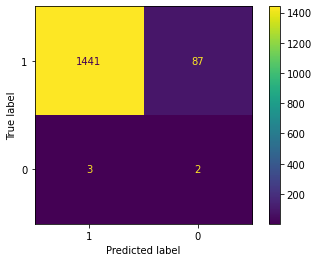

In [ ]:
#performence evaluation
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report
report=classification_report(y_test,y_pred)
result=confusion_matrix(y_pred,y_test)
score=accuracy_score(y_pred,y_test)
label=[1,0]
cmd=ConfusionMatrixDisplay(result,display_labels=label)
cmd.plot()


In [ ]:
result

array([[1441,   87],
       [   3,    2]])

In [ ]:
score

0.9412915851272016

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.40      0.02      0.04        89

    accuracy                           0.94      1533
   macro avg       0.67      0.51      0.51      1533
weighted avg       0.91      0.94      0.92      1533

